# Decision Trees
An introductory example of decision trees using data from this [interactive visualization](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/). This is an over-simplified example that doesn't use **normalization** as a pre-processing step, or **cross validation** as a mechanism for tuning the model.

## Set up

In [2]:
# Load packages
import pandas as pd
from sklearn import tree
from __future__ import division
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Read data
df = pd.read_csv('./data/housing-data.csv')

## Data Exploration
Some basic exploratory analysis before creating a decision tree

In [4]:
# What is the shape of our data?
df.shape

(492, 8)

In [7]:
# What variables are present in the dataset?
df.sample(n=5)

,in_sf,beds,bath,price,year_built,sqft,price_per_sqft,elevation
426,1,5.0,3.5,2995000,1947,3890,770,181
159,0,1.0,1.0,649000,1929,800,811,25
267,1,1.0,1.5,775000,2009,835,928,14
394,1,2.0,1.0,749000,1936,1450,517,110
119,0,4.0,4.0,13400000,2016,3331,4023,10


            in_sf        beds        bath         price   year_built  \
count  492.000000  492.000000  492.000000  4.920000e+02   492.000000   
mean     0.544715    2.155488    1.905691  2.020696e+06  1959.103659   
std      0.498503    1.305133    1.068150  2.824055e+06    40.579602   
min      0.000000    0.000000    1.000000  1.875180e+05  1880.000000   
25%      0.000000    1.000000    1.000000  7.490000e+05  1924.000000   
50%      1.000000    2.000000    2.000000  1.145000e+06  1960.000000   
75%      1.000000    3.000000    2.000000  1.908750e+06  2001.000000   
max      1.000000   10.000000   10.000000  2.750000e+07  2016.000000   

              sqft  price_per_sqft   elevation  
count   492.000000      492.000000  492.000000  
mean   1522.989837     1195.632114   39.845528  
std    1014.366252      733.765622   44.673248  
min     310.000000      270.000000    0.000000  
25%     832.750000      730.500000   10.000000  
50%    1312.000000      960.000000   18.500000  
75%    1

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1185235c0>]], dtype=object)

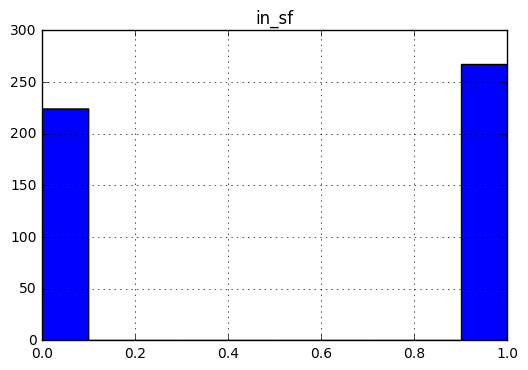

In [18]:
# What is the distribution of our outcome variable `in_sf`?
print(df.describe())
df.hist('in_sf')

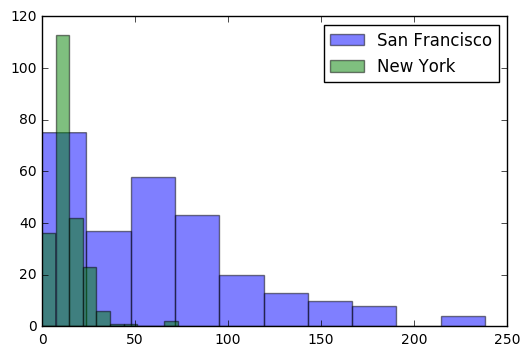

In [19]:
# How does elevation vary for houses in/not-in sf (I suggest an overlapping histogram)
plt.hist(df[df["in_sf"] == 1].elevation, alpha=0.5, label='San Francisco')
plt.hist(df[df["in_sf"] == 0].elevation, alpha=0.5, label='New York')
plt.legend(loc='upper right')
plt.show()

## Build a decision tree using all variables

In [147]:
# Create variables to hold features and outcomes separately
features = df.drop('in_sf', axis=1)
outcome = df.in_sf

In [148]:
# Split data into testing and training sets
train_features, test_features, train_outcome, test_outcome = train_test_split(features, outcome, test_size=0.30)

In [149]:
# Create a classifier and fit your features to your outcome
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_features, train_outcome)

## Assess Model Fit

In [150]:
# Generate a set of predictions for your test data


In [151]:
# Calculate accuracy for our test set (percentage of the time that prediction == truth)


In [152]:
# By comparison, how well do we predict in our training data?


## Show the tree
A little bit of a pain, though there are some alternatives to the [documentation](http://scikit-learn.org/stable/modules/tree.html) presented [here](https://github.com/scikit-learn/scikit-learn/issues/6261). You may have to do the following:

```
# Install graphviz in your terminal
conda install graphviz
```

I then suggest the following solution:

```
tree.export_graphviz(clf, out_file="mytree.dot")
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)
```


In [153]:
# Create tree diagram


## Comparion to KNN
Purely out of curiosity, how well does this model fit with KNN (for K=3)

In [140]:
# Create a knn classifier

In [141]:
# Fit our classifier to our training data

In [154]:
# Predict on our test data and assess accuracy
